<a href="https://colab.research.google.com/github/sumanthvasista107/Web-categorization-with-machine-learning/blob/main/Web_Categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import sqlite3
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Step 1: Upload the `places.sqlite` file
#uploaded = files.upload()

# Extract the file name (assuming only one file is uploaded)
file_name = next(iter(uploaded.keys()))

# Step 2: Connect to the SQLite database
conn = sqlite3.connect(file_name)
cursor = conn.cursor()

# Query to fetch the browsing history
query = """
SELECT
    moz_places.url,
    moz_places.title,
    COUNT(moz_historyvisits.id) as visit_count,
    datetime(moz_historyvisits.visit_date/1000000, 'unixepoch') as visit_time
FROM
    moz_historyvisits
JOIN
    moz_places
ON
    moz_historyvisits.place_id = moz_places.id
GROUP BY
    moz_places.url
ORDER BY
    visit_time DESC
"""

cursor.execute(query)
rows = cursor.fetchall()

# Close the connection
conn.close()

# Create a pandas DataFrame
columns = ['URL', 'Title', 'Visit Count', 'Visit Time']
history_df = pd.DataFrame(rows, columns=columns)

# Display the DataFrame
history_df.head()

# Save to CSV
history_df.to_csv('firefox_history.csv', index=False)

# Download the CSV file
files.download('firefox_history.csv')


Saving places.sqlite to places.sqlite


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
history_df = history_df.dropna()
history_df

,URL,Title,Visit Count,Visit Time
0,https://lxc.0ott.com/kannada-movies/,Kannada Movies - 0OTT,1,2024-06-30 13:02:48
1,https://lxc.0ott.com/hindi-movies/,Hindi Movies - 0OTT,1,2024-06-30 13:02:38
2,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:11
3,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
4,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
...,...,...,...,...
12235,https://www.1337x.tw/,"1337x | Free Movies, TV Series, Music, Games a...",4,2023-04-29 22:33:25
12236,https://www.google.com/search?client=firefox-b...,13337x - Google Search,1,2023-04-29 22:33:23
12237,https://1.1.1.1/,1.1.1.1 — The free app that makes your Interne...,3,2023-04-29 22:31:06
12239,https://www.google.com/search?client=firefox-b...,13377x - Google Search,2,2023-04-29 22:30:50


In [ ]:
import re
import math
gibberish_threshold = 3.5  # You may adjust this threshold based on your needs

def calculate_entropy(s):
    if not isinstance(s, str):  # Handle non-string values
        return 0
    # Calculate the probability of each character
    prob = [float(s.count(c)) / len(s) for c in dict.fromkeys(list(s))]
    # Calculate the entropy
    entropy = -sum(p * math.log2(p) for p in prob)
    return entropy

def is_gibberish(input_string, threshold=gibberish_threshold):
    if not isinstance(input_string, str):  # Handle non-string values
        return False
    # Remove non-alphabetic characters and convert to lowercase
    clean_string = re.sub(r'[^a-zA-Z]','', input_string).lower()
    # Calculate the entropy
    entropy = calculate_entropy(clean_string)
    # Determine if the string is gibberish based on the entropy threshold
    return entropy < threshold

def is_nonsense(text):
    return is_gibberish(text)

# Apply the function to detect gibberish titles
history_df['Is Gibberish'] = history_df['Title'].apply(is_nonsense)

# Filter out gibberish titles
clean_history_df = history_df[history_df['Is Gibberish'] == False]

# Drop the helper column
clean_history_df = clean_history_df.drop(columns=['Is Gibberish'])

# Display the first few rows to verify the cleaned data
clean_history_df

# Save the cleaned DataFrame to a new CSV file (optional)
#new_clean_history_df.to_csv('clean_firefox_history.csv', index=False)
#files.download('clean_firefox_history.csv')

,URL,Title,Visit Count,Visit Time
2,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:11
3,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
4,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
5,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
6,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,2,2024-06-29 15:52:39
...,...,...,...,...
12224,https://www.youtube.com/watch?v=NqMhsvwkqx0,(1) SCORPIO-N SHIPPING PROCESS STARTED 😍 | ROA...,1,2023-04-29 22:35:23
12233,https://www.1377x.to/torrent/5640716/Microsoft...,Download Microsoft Office 2021 LTSC Version 21...,1,2023-04-29 22:33:34
12235,https://www.1337x.tw/,"1337x | Free Movies, TV Series, Music, Games a...",4,2023-04-29 22:33:25
12237,https://1.1.1.1/,1.1.1.1 — The free app that makes your Interne...,3,2023-04-29 22:31:06


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load the data from your file
file_path = '/content/clean_firefox_history.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())


                                                 URL                   Title  \
0  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
1  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
2  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
3  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
4  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   

   Visit Count           Visit Time  
0            1  2024-06-29 15:53:11  
1            1  2024-06-29 15:53:10  
2            1  2024-06-29 15:53:10  
3            1  2024-06-29 15:53:10  
4            2  2024-06-29 15:52:39  


In [ ]:
# Custom transformer to select a specific column
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, column):
        self.column = column

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.column]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


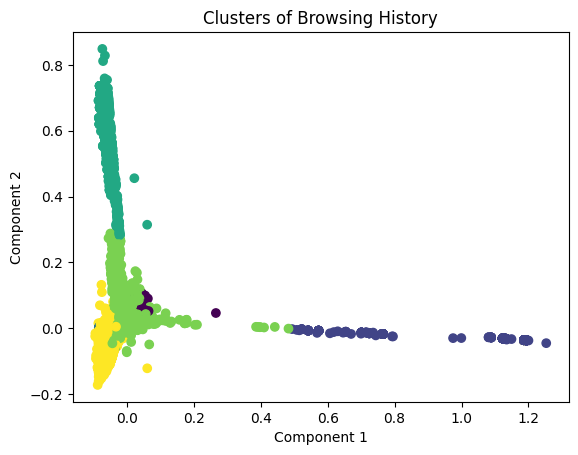

Cluster 0:
                                                    URL  \
34    https://mail.google.com/mail/u/1/#category/pro...   
35    https://mail.google.com/mail/u/1/#category/upd...   
36             https://mail.google.com/mail/u/1/#drafts   
37    https://mail.google.com/mail/u/1/#inbox/FMfcgz...   
38    https://mail.google.com/mail/u/1/#inbox/FMfcgz...   
...                                                 ...   
8348  https://mail.google.com/mail/u/0/#inbox/FMfcgz...   
8514  https://mail.google.com/mail/u/0/#inbox?compos...   
8515  https://mail.google.com/mail/u/0/#inbox?compos...   
8947  https://mail.google.com/mail/u/0/#inbox/QgrcJH...   
8948            https://mail.google.com/mail/u/0/#inbox   

                                                  Title  
34    Promotions (2,063) - sumanthvasista775@gmail.c...  
35    Updates (2,840) - sumanthvasista775@gmail.com ...  
36    Drafts (10) - sumanthvasista775@gmail.com - Gmail  
37    Your A/C is Credited... - sumanthvasista77

In [ ]:
# Create a pipeline for URL and history TF-IDF vectorization
url_pipeline = Pipeline([
    ('selector', ColumnSelector(column='URL')),
    ('tfidf', TfidfVectorizer())
])

history_pipeline = Pipeline([
    ('selector', ColumnSelector(column='Title')),
    ('tfidf', TfidfVectorizer())
])

# Combine the URL and history pipelines
combined_features = FeatureUnion([
    ('URL', url_pipeline),
    ('Title', history_pipeline)
])

# Transform the data
X = combined_features.fit_transform(df)

# Apply KMeans clustering
n_clusters = 6 # Number of clusters to create (adjust as needed)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['cluster'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clusters of Browsing History')
plt.show()

# Print the clusters
for i in range(n_clusters):
    print(f"Cluster {i}:")
    # Use the correct column names 'URL' and 'Title'
    print(df[df['cluster'] == i][['URL', 'Title']])
    print("\n")


In [ ]:
# Manually label the clusters based on their characteristics

url = 'URL'
title = 'Title'

cluster_labels = {
    0: 'entertainment',
    #1: 'Productivity/Blog',
    2: 'shopping',
    3: 'news',
    4: 'education',
    5: 'social_media',
    6: 'mail'
}

# Function to categorize entries based on rules
def categorize_entry(url, title):
    if 'mail' in url or 'email' in url:
        return 'Mail'
    elif 'netflix' in url or 'movie' in title or 'film' in title:
        return 'entertainment'
    elif 'youtube' in url and ('education' in title or 'informative' in title):
        return 'Youtube'
    elif 'shopping' in url or 'shop' in url or 'amazon' in url or 'flipkart' in url or 'clothing' in url or 'clothing' in title:
        return 'shopping'
    elif 'Blog' in title or 'blog' in url or 'colab' in url or 'kaggle' in url or 'w3school' in url:
        return 'education'
    elif 'social' in url or 'social' in title or 'facebook' in url or 'instagram' in url or 'twitter' in title:
        return 'social_media'
    elif 'education' in url or 'education' in title:
        return 'education'
    elif 'news' in title or 'newspaper' in title or 'news' in url:
        return 'news'
    else:
        return 'entertainment'

# Apply the function to categorize entries
df['category'] = df.apply(lambda x: categorize_entry(x['URL'], x['Title']), axis=1)

# Display the DataFrame with assigned categories
print(df[['URL', 'Title', 'category']])

# Save the labeled data to a new CSV file
df.to_csv('labeled_browsing_history.csv', index=False)

files.download('labeled_browsing_history.csv')

                                                    URL  \
0     https://colab.research.google.com/drive/1IW3Hj...   
1     https://colab.research.google.com/drive/1IW3Hj...   
2     https://colab.research.google.com/drive/1IW3Hj...   
3     https://colab.research.google.com/drive/1IW3Hj...   
4     https://colab.research.google.com/drive/1IW3Hj...   
...                                                 ...   
8980        https://www.youtube.com/watch?v=NqMhsvwkqx0   
8981  https://www.1377x.to/torrent/5640716/Microsoft...   
8982                              https://www.1337x.tw/   
8983                                   https://1.1.1.1/   
8984     https://www.mozilla.org/en-US/privacy/firefox/   

                                                  Title       category  
0                                Firefox .ipynb - Colab      education  
1                                Firefox .ipynb - Colab      education  
2                                Firefox .ipynb - Colab      education  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#next do analysis based on individual category and the number

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Example dataset
# Load the data from your file
file_path = '/content/labeled_browsing_history.csv'
labelled_df = pd.read_csv(file_path)

# Load the dataset into a DataFrame
#labelled_df = pd.DataFrame(data)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['URL', 'Title']], df['category'], test_size=0.2, random_state=42)

# Create a pipeline for TF-IDF vectorization and classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Train the model
text_clf.fit(X_train['Title'], y_train)

# Evaluate the model
y_pred = text_clf.predict(X_test['Title'])
print(classification_report(y_test, y_pred))

# Example function to predict category for new URL and title
def predict_category(url, title):
    return text_clf.predict([title])[0]

# Example usage
example_url = ' https://www.youtube.com/results?search_query=asianet+news+live+kannada'
example_title = '(2) asianet news live kannada - YouTube'
print(predict_category(example_url, example_title))


               precision    recall  f1-score   support

         Mail       1.00      0.92      0.96        36
    education       0.99      0.93      0.96       107
entertainment       0.99      1.00      0.99      1635
         news       1.00      0.50      0.67         4
     shopping       1.00      0.55      0.71        11
 social_media       1.00      0.25      0.40         4

     accuracy                           0.99      1797
    macro avg       1.00      0.69      0.78      1797
 weighted avg       0.99      0.99      0.99      1797

news


In [ ]:
file_path = '/content/labeled_browsing_history.csv'
labelled_df = pd.read_csv(file_path)

# Load the dataset into a DataFrame
#labelled_df = pd.DataFrame(data)

# Convert all columns to string type
labelled_df = labelled_df.astype(str) #This will ensure all values are strings

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(labelled_df[['URL', 'Title']], df['category'], test_size=0.2, random_state=42)

# Create a pipeline for TF-IDF vectorization and classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Train the model
text_clf.fit(X_train.apply(lambda x: ' '.join(x), axis=1), y_train)

# Evaluate the model
y_pred = text_clf.predict(X_test.apply(lambda x: ' '.join(x), axis=1))
print(classification_report(y_test, y_pred))

# Example function to predict category for new URL and title
def predict_category(df):
    # Ensure all values in the DataFrame are strings
    df = df.astype(str)
    return text_clf.predict(df.apply(lambda x: ' '.join(x), axis=1))

               precision    recall  f1-score   support

         Mail       1.00      0.92      0.96        36
    education       0.99      0.98      0.99       107
entertainment       0.99      1.00      1.00      1635
         news       1.00      0.50      0.67         4
     shopping       1.00      0.64      0.78        11
 social_media       1.00      0.50      0.67         4

     accuracy                           0.99      1797
    macro avg       1.00      0.76      0.84      1797
 weighted avg       0.99      0.99      0.99      1797



In [ ]:
cat = predict_category(clean_history_df)
cat

clean_history_df

,URL,Title,Visit Count,Visit Time
2,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:11
3,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
4,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
5,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,1,2024-06-29 15:53:10
6,https://colab.research.google.com/drive/1IW3Hj...,Firefox .ipynb - Colab,2,2024-06-29 15:52:39
...,...,...,...,...
12224,https://www.youtube.com/watch?v=NqMhsvwkqx0,(1) SCORPIO-N SHIPPING PROCESS STARTED 😍 | ROA...,1,2023-04-29 22:35:23
12233,https://www.1377x.to/torrent/5640716/Microsoft...,Download Microsoft Office 2021 LTSC Version 21...,1,2023-04-29 22:33:34
12235,https://www.1337x.tw/,"1337x | Free Movies, TV Series, Music, Games a...",4,2023-04-29 22:33:25
12237,https://1.1.1.1/,1.1.1.1 — The free app that makes your Interne...,3,2023-04-29 22:31:06


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load your dataset from a file (CSV assumed)
file_path = '/content/clean_firefox_history.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['URL', 'Title']], test_size=0.2, random_state=42)

# Create a pipeline for TF-IDF vectorization and classification
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(kernel='linear'))
])

# Train the model
text_clf.fit(X_train.apply(lambda x: ' '.join(x.astype(str)), axis=1), y_train) # Convert to string during training

# Evaluate the model
y_pred = text_clf.predict(X_test.apply(lambda x: ' '.join(x.astype(str)), axis=1)) # Convert to string during prediction
print(classification_report(y_test, y_pred))

# Example function to predict category for new URL and title
def predict_category(df):
    # Ensure all values are strings before joining
    return text_clf.predict(df.apply(lambda x: ' '.join(x.astype(str)), axis=1))

# Example usage
#example_url = 'https://www.netflix.com'
#example_title = 'Watch a movie'
new_history = predict_category(clean_history_df)

                                                 URL                   Title  \
0  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
1  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
2  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
3  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
4  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   

   Visit Count           Visit Time  
0            1  2024-06-29 15:53:11  
1            1  2024-06-29 15:53:10  
2            1  2024-06-29 15:53:10  
3            1  2024-06-29 15:53:10  
4            2  2024-06-29 15:52:39  


ValueError: not enough values to unpack (expected 4, got 2)

In [ ]:
# Convert the NumPy array 'new_history' to a pandas Series
new_history_series = pd.Series(new_history, name='Predicted Category')

# Concatenate the new predictions with the original DataFrame
result_df = pd.concat([clean_history_df, new_history_series], axis=1)

print(result_df.head())

                                                 URL                   Title  \
2  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
3  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
4  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
5  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   
6  https://colab.research.google.com/drive/1IW3Hj...  Firefox .ipynb - Colab   

   Visit Count           Visit Time Predicted Category  
2          1.0  2024-06-29 15:53:11          education  
3          1.0  2024-06-29 15:53:10          education  
4          1.0  2024-06-29 15:53:10          education  
5          1.0  2024-06-29 15:53:10          education  
6          2.0  2024-06-29 15:52:39          education  


In [ ]:
result_df.to_csv('result_df.csv', index=False)
files.download('result_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
keywords = 'youtube'

filtered_history_df = history_df[
    history_df['Title'].str.contains(keywords, case=False, na = False) |
    history_df['URL'].str.contains(keywords, case=False, na = False)
]

title_values = filtered_history_df.Title.value_counts()
url_values = filtered_history_df.URL.value_counts()

print(title_values)
print(url_values)

#filtered_history_df.to_csv('filtered_history.csv', index=False)
#files.download('filtered_history.csv')

Title
YouTube Music                                                                                68
Best Indian Cuisine Dishes | MasterChef Australia | MasterChef World - YouTube                6
Download video FHD quality                                                                    5
Heavy Spoilers - YouTube                                                                      5
YouTube                                                                                       5
                                                                                             ..
(26) Linkin Park - What I've Done (Transformers) - YouTube                                    1
Blue tickets in Wolverhampton at The Civic at The Halls Wolverhampton on Fri, May 3, 2024     1
FanSight                                                                                      1
(26) Ed Sheeran - Perfect (Lyrics) [Baby Im Dancing In The Dark] - YouTube                    1
(9) YouTube                       

In [ ]:
filtered_history_df

,URL,Title,Visit Count,Visit Time
42,https://www.youtube.com/watch?v=Al4bwR--BgY,(10) 5 free resources to help you get a machin...,1,2024-06-29 10:36:47
43,https://www.youtube.com/@mrdbourke/videos,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:28
44,https://www.youtube.com/@mrdbourke,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:18
63,https://www.youtube.com/watch?v=O0H2m_r-ZhI,(9) A Day in the Life of a Machine Learning En...,1,2024-06-29 09:58:58
64,https://www.youtube.com/shorts/oKptTT5LhFM,(9) He took equality to a new level 😂 | Dil To...,1,2024-06-29 09:57:57
...,...,...,...,...
12239,https://accounts.google.co.in/accounts/SetSID?...,None,1,2023-04-29 22:35:10
12240,https://accounts.google.com/v3/signin/identifi...,YouTube,1,2023-04-29 22:34:55
12241,https://accounts.google.com/InteractiveLogin?c...,None,1,2023-04-29 22:34:55
12242,https://www.youtube.com/?themeRefresh=1,YouTube,5,2023-04-29 22:34:49


In [ ]:
import re
import math
gibberish_threshold = 3.5  # You may adjust this threshold based on your needs

def calculate_entropy(s):
    if not isinstance(s, str):  # Handle non-string values
        return 0
    # Calculate the probability of each character
    prob = [float(s.count(c)) / len(s) for c in dict.fromkeys(list(s))]
    # Calculate the entropy
    entropy = -sum(p * math.log2(p) for p in prob)
    return entropy

def is_gibberish(input_string, threshold=gibberish_threshold):
    if not isinstance(input_string, str):  # Handle non-string values
        return False
    # Remove non-alphabetic characters and convert to lowercase
    clean_string = re.sub(r'[^a-zA-Z]','', input_string).lower()
    # Calculate the entropy
    entropy = calculate_entropy(clean_string)
    # Determine if the string is gibberish based on the entropy threshold
    return entropy < threshold

def is_nonsense(text):
    return is_gibberish(text)

# Apply the function to detect gibberish titles
filtered_history_df['Is Gibberish'] = filtered_history_df['Title'].apply(is_nonsense)

# Filter out gibberish titles
clean_history_df = filtered_history_df[filtered_history_df['Is Gibberish'] == False]

# Drop the helper column
clean_history_df = clean_history_df.drop(columns=['Is Gibberish'])

# Display the first few rows to verify the cleaned data
clean_history_df

# Save the cleaned DataFrame to a new CSV file (optional)
#new_clean_history_df.to_csv('clean_firefox_history.csv', index=False)
#files.download('clean_firefox_history.csv')

<ipython-input-92-47f4eae43a86>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_history_df['Is Gibberish'] = filtered_history_df['Title'].apply(is_nonsense)


,URL,Title,Visit Count,Visit Time
42,https://www.youtube.com/watch?v=Al4bwR--BgY,(10) 5 free resources to help you get a machin...,1,2024-06-29 10:36:47
43,https://www.youtube.com/@mrdbourke/videos,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:28
44,https://www.youtube.com/@mrdbourke,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:18
63,https://www.youtube.com/watch?v=O0H2m_r-ZhI,(9) A Day in the Life of a Machine Learning En...,1,2024-06-29 09:58:58
64,https://www.youtube.com/shorts/oKptTT5LhFM,(9) He took equality to a new level 😂 | Dil To...,1,2024-06-29 09:57:57
...,...,...,...,...
12236,https://www.youtube.com/signin?action_handle_s...,None,2,2023-04-29 22:35:11
12237,https://accounts.youtube.com/accounts/SetSID?s...,None,1,2023-04-29 22:35:10
12238,https://accounts.google.co.uk/accounts/SetSID?...,None,1,2023-04-29 22:35:10
12239,https://accounts.google.co.in/accounts/SetSID?...,None,1,2023-04-29 22:35:10


In [ ]:
def is_foreign_language(text):
    if not isinstance(text, str):  # Handle non-string values
        return False
    # Regular expression to detect non-English characters
    non_english_pattern = re.compile(r'[^\x00-\x7F]')  # Matches any character not in the ASCII range

    # Check if the text contains non-English characters
    return bool(non_english_pattern.search(text))

# Apply the function to filter out rows with foreign language text in the 'Title' column
clean_history_df['Is Foreign Language'] = clean_history_df['Title'].apply(is_foreign_language)
# Use clean_history_df instead of history_df
clean_history_df = clean_history_df[clean_history_df['Is Foreign Language'] == False]

In [ ]:
clean_history_df

,URL,Title,Visit Count,Visit Time,Is Foreign Language
42,https://www.youtube.com/watch?v=Al4bwR--BgY,(10) 5 free resources to help you get a machin...,1,2024-06-29 10:36:47,False
43,https://www.youtube.com/@mrdbourke/videos,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:28,False
44,https://www.youtube.com/@mrdbourke,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:18,False
63,https://www.youtube.com/watch?v=O0H2m_r-ZhI,(9) A Day in the Life of a Machine Learning En...,1,2024-06-29 09:58:58,False
85,https://www.simplilearn.com/pgp-cloud-computin...,Cloud Computing Bootcamp Certification by Caltech,1,2024-06-27 17:50:20,False
...,...,...,...,...,...
12236,https://www.youtube.com/signin?action_handle_s...,None,2,2023-04-29 22:35:11,False
12237,https://accounts.youtube.com/accounts/SetSID?s...,None,1,2023-04-29 22:35:10,False
12238,https://accounts.google.co.uk/accounts/SetSID?...,None,1,2023-04-29 22:35:10,False
12239,https://accounts.google.co.in/accounts/SetSID?...,None,1,2023-04-29 22:35:10,False


In [ ]:
clean_history_df.Title.dropna()

42       (10) 5 free resources to help you get a machin...
43                             (9) Daniel Bourke - YouTube
44                             (9) Daniel Bourke - YouTube
63       (9) A Day in the Life of a Machine Learning En...
85       Cloud Computing Bootcamp Certification by Caltech
                               ...                        
12157     (1) How to Make a Gantt Chart in Excel - YouTube
12158         How to Make a Gantt Chart in Excel - YouTube
12176     (1) How to Make a Gantt Chart in Excel - YouTube
12177     (1) how to create gantt chart in excel - YouTube
12188    (1) Creating a Table of Contents in Microsoft ...
Name: Title, Length: 4067, dtype: object

In [ ]:
clean_firefox_history= clean_history_df.dropna()

In [ ]:
clean_firefox_history

,URL,Title,Visit Count,Visit Time,Is Foreign Language
42,https://www.youtube.com/watch?v=Al4bwR--BgY,(10) 5 free resources to help you get a machin...,1,2024-06-29 10:36:47,False
43,https://www.youtube.com/@mrdbourke/videos,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:28,False
44,https://www.youtube.com/@mrdbourke,(9) Daniel Bourke - YouTube,1,2024-06-29 10:36:18,False
63,https://www.youtube.com/watch?v=O0H2m_r-ZhI,(9) A Day in the Life of a Machine Learning En...,1,2024-06-29 09:58:58,False
85,https://www.simplilearn.com/pgp-cloud-computin...,Cloud Computing Bootcamp Certification by Caltech,1,2024-06-27 17:50:20,False
...,...,...,...,...,...
12157,https://www.youtube.com/watch?v=un8j6QqpYa0&li...,(1) How to Make a Gantt Chart in Excel - YouTube,1,2023-04-30 17:13:12,False
12158,https://www.youtube.com/watch?list=PL_nWLkNDLz...,How to Make a Gantt Chart in Excel - YouTube,1,2023-04-30 17:13:09,False
12176,https://www.youtube.com/watch?v=un8j6QqpYa0,(1) How to Make a Gantt Chart in Excel - YouTube,1,2023-04-30 15:49:47,False
12177,https://www.youtube.com/results?search_query=h...,(1) how to create gantt chart in excel - YouTube,1,2023-04-30 15:49:30,False


In [ ]:
# Save the cleaned DataFrame to a new CSV file (optional)
clean_firefox_history.to_csv('clean_firefox_history.csv', index=False)
files.download('clean_firefox_history.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
clean_firefox_history.Title

42       (10) 5 free resources to help you get a machin...
43                             (9) Daniel Bourke - YouTube
44                             (9) Daniel Bourke - YouTube
63       (9) A Day in the Life of a Machine Learning En...
85       Cloud Computing Bootcamp Certification by Caltech
                               ...                        
12157     (1) How to Make a Gantt Chart in Excel - YouTube
12158         How to Make a Gantt Chart in Excel - YouTube
12176     (1) How to Make a Gantt Chart in Excel - YouTube
12177     (1) how to create gantt chart in excel - YouTube
12188    (1) Creating a Table of Contents in Microsoft ...
Name: Title, Length: 4067, dtype: object